In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [3]:
train_data = pd.read_csv("/home/nawinrajkumar/Desktop/Spaceship-Titanic/train.csv")

In [4]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
split = pd.DataFrame(train_data['Name'].str.split(' ',expand=True))

In [6]:
train_data['HasFamily'] = split[1].duplicated()
  

In [7]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HasFamily
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,True
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,True


In [8]:
train_data['Cabin'].duplicated().value_counts()

False    6561
True     2132
Name: Cabin, dtype: int64

In [9]:
for i in range(len(train_data.HasFamily)-1):
  if train_data.at[i,'HasFamily'] == True:
    train_data.at[i-1,'HasFamily'] = True



In [10]:
df = pd.DataFrame(train_data[train_data['VIP'] ==  True])
df2 = pd.DataFrame(train_data[train_data['VIP'] ==  False])

In [11]:
train_data.set_index('PassengerId')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HasFamily
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,True
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,True
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,True
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True


In [12]:
VIP_avg = ((train_data[train_data['VIP'] ==  True].FoodCourt + train_data[train_data['VIP'] ==  True].ShoppingMall + train_data[train_data['VIP'] ==  True].Spa + train_data[train_data['VIP'] ==  True].VRDeck)/5).mean()
non_VIP_avg = ((train_data[train_data['VIP'] ==  False].FoodCourt + train_data[train_data['VIP'] ==  False].ShoppingMall + train_data[train_data['VIP'] ==  False].Spa + train_data[train_data['VIP'] ==  False].VRDeck)/5).mean() 

In [13]:
print((VIP_avg,non_VIP_avg))

(824.6483516483516, 239.2638965835642)


In [14]:
train_data.VIP.value_counts(dropna = False)

False    8291
NaN       203
True      199
Name: VIP, dtype: int64

In [15]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].mean())
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].mean())
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean())
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].mean())
train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].mean())

Filling the null values of VIP column by finding the mean of the expenses by finding the mean of 5 columns.


In [16]:
for i in range(len(train_data)):
  if train_data.loc[i].isnull()['VIP'] == True:
    dff = ((train_data.loc[i]['RoomService'] + train_data.loc[i]['FoodCourt'] + train_data.loc[i]['ShoppingMall'] + train_data.loc[i]['Spa'] + train_data.loc[i]['VRDeck']) / 5)
    if dff > 500:
      train_data.at[i,'VIP'] = True
    else:
      train_data.at[i,'VIP'] = False
  else:
    continue
   


In [17]:
train_data.VIP.value_counts(dropna = False)

False    8470
True      223
Name: VIP, dtype: int64

In [18]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
HasFamily         0
dtype: int64

In [19]:
train_data['Name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [22]:
imp = SimpleImputer(strategy='most_frequent')
train_data['HomePlanet']=imp.fit_transform(train_data[['HomePlanet']])
train_data['Destination']=imp.fit_transform(train_data[['Destination']])

In [23]:
train_data['Destination'] = label_encoder.fit_transform(train_data['Destination'])
train_data['HomePlanet'] = label_encoder.fit_transform(train_data['HomePlanet'])

/tmp/ipykernel_28770/1192578495.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<AxesSubplot: >

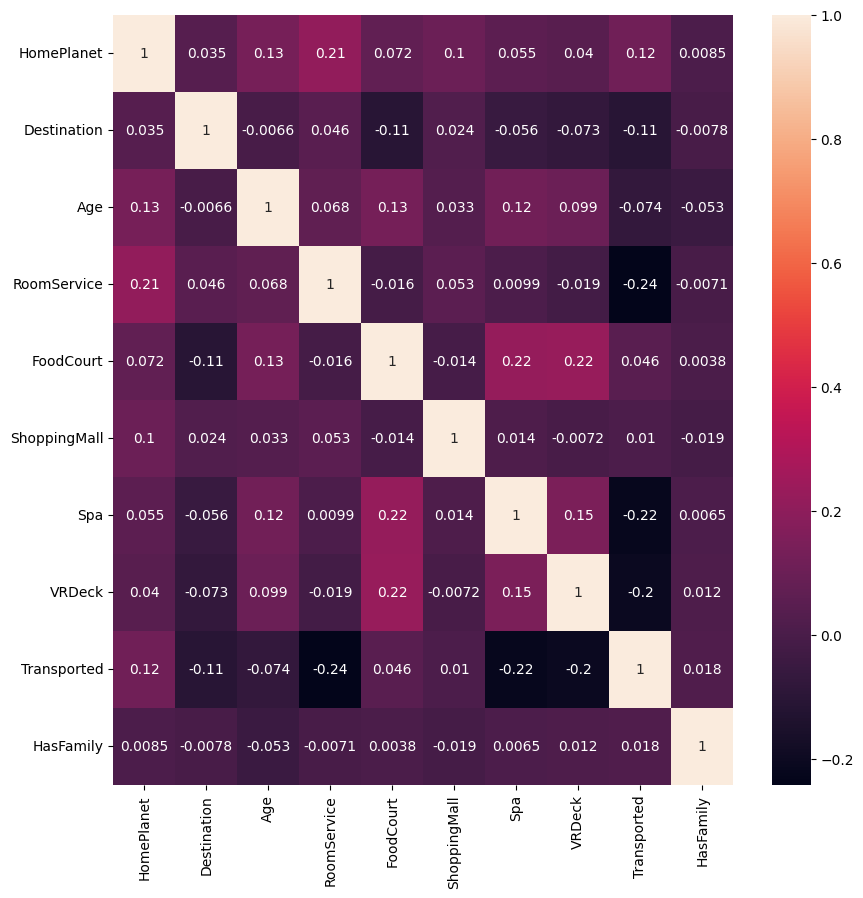

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(), annot=True)

In [26]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
HasFamily         0
dtype: int64

In [27]:
train_data.CryoSleep.astype(bool).corr(train_data.Transported)

0.45174373706870374

Filling null values of Cryo Sleep using the Transported Column as there is a  posititve correlation between these two columns.

In [28]:
for i in range(len(train_data)):
  if train_data.loc[i].isnull()['CryoSleep'] == True:
    if train_data.loc[i]['Transported'] == True:
      train_data.at[i, 'CryoSleep'] = True
    else:
      train_data.at[i, 'CryoSleep'] = False

In [29]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
HasFamily         0
dtype: int64

In [30]:
train_data['Cabin'].fillna('T/0/P',inplace=True)
x = train_data['Cabin'].str.split('/',expand=True)
x.rename(columns={0:'Cabinn',1:'Deck',2:'Seat'},inplace = True)

In [31]:
train_data = train_data.join(x,how='right')

In [34]:
del train_data['Cabin']


KeyError: 'Cabin'

In [35]:
del train_data['Seat']

In [36]:
del train_data['Name']

In [37]:
train_data['Expenses'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['VRDeck'] + train_data['Spa'] 

In [38]:
train_data.isnull().sum()


PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
HasFamily       0
Cabinn          0
Deck            0
Expenses        0
dtype: int64

In [58]:
X = train_data.drop("Transported",axis =1)
y = train_data['Transported']

In [67]:
X

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HasFamily,Cabinn,Deck,Expenses
0,0001_01,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,0.0
1,0002_01,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,False,F,0,736.0
2,0003_01,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,True,A,0,10383.0
3,0003_02,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,True,A,0,5176.0
4,0004_01,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,False,F,1,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,True,A,98,8536.0
8689,9278_01,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,True,G,1499,0.0
8690,9279_01,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,1873.0
8691,9280_01,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,True,E,608,4637.0


In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   int64  
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  HasFamily     8693 non-null   bool   
 12  Cabinn        8693 non-null   object 
 13  Deck          8693 non-null   int64  
 14  Expenses      8693 non-null   float64
dtypes: bool(3), float64(7), int64(3), object(2)
memory usage: 840.6+ KB


In [83]:
X.set_index('PassengerId',inplace=True)
X['VIP'] = X['VIP'].astype(bool)
X['CryoSleep'] = X['CryoSleep'].astype(bool)
X['HasFamily'] = X['HasFamily'].astype(bool)
X['Deck'] = X['Deck'].astype(int)
X['Cabinn'] = label_encoder.fit_transform(X['Cabinn'])


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [85]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [99]:
evalset = [(X_train, y_train), (X_test,y_test)]


In [118]:
# fit model no training data
model = XGBClassifier()
history = model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

/home/nawinrajkumar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.57623	validation_1-logloss:0.58495
[1]	validation_0-logloss:0.50864	validation_1-logloss:0.52399
[2]	validation_0-logloss:0.46628	validation_1-logloss:0.48778
[3]	validation_0-logloss:0.43865	validation_1-logloss:0.46426
[4]	validation_0-logloss:0.41727	validation_1-logloss:0.44641
[5]	validation_0-logloss:0.40383	validation_1-logloss:0.43718
[6]	validation_0-logloss:0.39102	validation_1-logloss:0.42878
[7]	validation_0-logloss:0.38005	validation_1-logloss:0.42297
[8]	validation_0-logloss:0.36981	validation_1-logloss:0.41912
[9]	validation_0-logloss:0.36161	validation_1-logloss:0.41480
[10]	validation_0-logloss:0.35539	validation_1-logloss:0.41311
[11]	validation_0-logloss:0.34950	validation_1-logloss:0.41139
[12]	validation_0-logloss:0.34250	validation_1-logloss:0.41092
[13]	validation_0-logloss:0.33482	validation_1-logloss:0.40987
[14]	validation_0-logloss:0.33165	validation_1-logloss:0.40855
[15]	validation_0-logloss:0.32931	validation_1-logloss:0.40887
[1

In [119]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]


In [120]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.33%


In [121]:
results = model.evals_result()


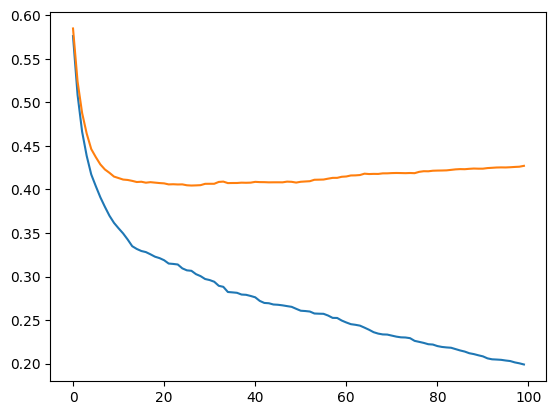

In [122]:
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')